In [1]:
#!pip install missingpy
#!pip install pycountry_convert

import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from pycountry_convert import country_alpha2_to_country_name, country_name_to_country_alpha3
from missingpy import MissForest
import plotly.express as px

# Main table

In [2]:
# Reading in the gzipped tsv file
mainDF = pd.read_table('https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/FISH_LD_MAIN/?format=TSV&compressed=true&i', compression='gzip')
mainDF

,"freq,pres,species,natvessr,dest_use,unit,geo\TIME_PERIOD",2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"A,CLA,BSS,TOTAL,HCN,EUR,EU27_2020",:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,19.396 e,:,:,:
1,"A,CLA,BSS,TOTAL,HCN,EUR,NL",:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,19.396 e,:,:,:
2,"A,CLA,BSS,TOTAL,HCN,EUR_T,EU27_2020",:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,9698 e,:,:,:
3,"A,CLA,BSS,TOTAL,HCN,EUR_T,NL",:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,9698 e,:,:,:
4,"A,CLA,BSS,TOTAL,HCN,TPW,EU27_2020",:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,0.002 e,:,:,:
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382231,"A,WHL,WIT,TOTAL,IND,EUR_T,NO",:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,327.4467,:,:
382232,"A,WHL,WIT,TOTAL,IND,TPW,NO",:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,0.4,:,:
382233,"A,WHL,WIT,TOTAL,TOTAL,EUR,NO",:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,130.9787,:,:
382234,"A,WHL,WIT,TOTAL,TOTAL,EUR_T,NO",:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,327.4467,:,:


The first 7 columns were separated by commas and the rest with tabs. It's also obvious that there is a white space at the end of every numerical column name, so I removed these white spaces with ```rename``` and ```str.strip()``` methods

In [3]:
# Showing all columns names
list(mainDF.keys())

['freq,pres,species,natvessr,dest_use,unit,geo\\TIME_PERIOD',
 '2000 ',
 '2001 ',
 '2002 ',
 '2003 ',
 '2004 ',
 '2005 ',
 '2006 ',
 '2007 ',
 '2008 ',
 '2009 ',
 '2010 ',
 '2011 ',
 '2012 ',
 '2013 ',
 '2014 ',
 '2015 ',
 '2016 ',
 '2017 ',
 '2018 ',
 '2019 ',
 '2020 ',
 '2021 ']

In [4]:
# removing white spaces from column names with rename and str.strip() methods
mainDF = mainDF.rename(columns=lambda x: x.strip()) # inplace not suitable here!
mainDF

,"freq,pres,species,natvessr,dest_use,unit,geo\TIME_PERIOD",2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"A,CLA,BSS,TOTAL,HCN,EUR,EU27_2020",:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,19.396 e,:,:,:
1,"A,CLA,BSS,TOTAL,HCN,EUR,NL",:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,19.396 e,:,:,:
2,"A,CLA,BSS,TOTAL,HCN,EUR_T,EU27_2020",:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,9698 e,:,:,:
3,"A,CLA,BSS,TOTAL,HCN,EUR_T,NL",:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,9698 e,:,:,:
4,"A,CLA,BSS,TOTAL,HCN,TPW,EU27_2020",:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,0.002 e,:,:,:
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382231,"A,WHL,WIT,TOTAL,IND,EUR_T,NO",:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,327.4467,:,:
382232,"A,WHL,WIT,TOTAL,IND,TPW,NO",:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,0.4,:,:
382233,"A,WHL,WIT,TOTAL,TOTAL,EUR,NO",:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,130.9787,:,:
382234,"A,WHL,WIT,TOTAL,TOTAL,EUR_T,NO",:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,327.4467,:,:


In [5]:
list(mainDF.keys())

['freq,pres,species,natvessr,dest_use,unit,geo\\TIME_PERIOD',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021']

Showing first cell of the table to make sure the first columns separated by commas are grouped

In [6]:
mainDF.loc[0][0]

'A,CLA,BSS,TOTAL,HCN,EUR,EU27_2020'

In [7]:
# Second cell from first row
mainDF.loc[0][1]

': '

In the preparation of the data frame I created and merged two intermediary data frames containing:
1) The categorical columns (first seven)  
2) The columns with years and weights  
  
-> It also took extra actions for the column "geo", since it was between comma and tab separated values

### Handling the categorical colums

In [8]:
# Reading in the gzipped tsv file
categoricalDF = pd.read_table('https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/FISH_LD_MAIN/?format=TSV&compressed=true&i', compression='gzip', usecols = [0,1,2,3,4,5,6], delimiter=',')
categoricalDF

,freq,pres,species,natvessr,dest_use,unit,geo\TIME_PERIOD\t2000 \t2001 \t2002 \t2003 \t2004 \t2005 \t2006 \t2007 \t2008 \t2009 \t2010 \t2011 \t2012 \t2013 \t2014 \t2015 \t2016 \t2017 \t2018 \t2019 \t2020 \t2021
0,A,CLA,BSS,TOTAL,HCN,EUR,EU27_2020\t: \t: \t: \t: \t: \t: \t: \t: \t: \...
1,A,CLA,BSS,TOTAL,HCN,EUR,NL\t: \t: \t: \t: \t: \t: \t: \t: \t: \t: \t: ...
2,A,CLA,BSS,TOTAL,HCN,EUR_T,EU27_2020\t: \t: \t: \t: \t: \t: \t: \t: \t: \...
3,A,CLA,BSS,TOTAL,HCN,EUR_T,NL\t: \t: \t: \t: \t: \t: \t: \t: \t: \t: \t: ...
4,A,CLA,BSS,TOTAL,HCN,TPW,EU27_2020\t: \t: \t: \t: \t: \t: \t: \t: \t: \...
...,...,...,...,...,...,...,...
382231,A,WHL,WIT,TOTAL,IND,EUR_T,NO\t: \t: \t: \t: \t: \t: \t: \t: \t: \t: \t: ...
382232,A,WHL,WIT,TOTAL,IND,TPW,NO\t: \t: \t: \t: \t: \t: \t: \t: \t: \t: \t: ...
382233,A,WHL,WIT,TOTAL,TOTAL,EUR,NO\t: \t: \t: \t: \t: \t: \t: \t: \t: \t: \t: ...
382234,A,WHL,WIT,TOTAL,TOTAL,EUR_T,NO\t: \t: \t: \t: \t: \t: \t: \t: \t: \t: \t: ...


In [9]:
# Renaming the last column as just "geo"
categoricalDF.rename(columns = {'geo\TIME_PERIOD\t2000 \t2001 \t2002 \t2003 \t2004 \t2005 \t2006 \t2007 \t2008 \t2009 \t2010 \t2011 \t2012 \t2013 \t2014 \t2015 \t2016 \t2017 \t2018 \t2019 \t2020 \t2021 ':'geo'}, inplace = True)
categoricalDF

,freq,pres,species,natvessr,dest_use,unit,geo
0,A,CLA,BSS,TOTAL,HCN,EUR,EU27_2020\t: \t: \t: \t: \t: \t: \t: \t: \t: \...
1,A,CLA,BSS,TOTAL,HCN,EUR,NL\t: \t: \t: \t: \t: \t: \t: \t: \t: \t: \t: ...
2,A,CLA,BSS,TOTAL,HCN,EUR_T,EU27_2020\t: \t: \t: \t: \t: \t: \t: \t: \t: \...
3,A,CLA,BSS,TOTAL,HCN,EUR_T,NL\t: \t: \t: \t: \t: \t: \t: \t: \t: \t: \t: ...
4,A,CLA,BSS,TOTAL,HCN,TPW,EU27_2020\t: \t: \t: \t: \t: \t: \t: \t: \t: \...
...,...,...,...,...,...,...,...
382231,A,WHL,WIT,TOTAL,IND,EUR_T,NO\t: \t: \t: \t: \t: \t: \t: \t: \t: \t: \t: ...
382232,A,WHL,WIT,TOTAL,IND,TPW,NO\t: \t: \t: \t: \t: \t: \t: \t: \t: \t: \t: ...
382233,A,WHL,WIT,TOTAL,TOTAL,EUR,NO\t: \t: \t: \t: \t: \t: \t: \t: \t: \t: \t: ...
382234,A,WHL,WIT,TOTAL,TOTAL,EUR_T,NO\t: \t: \t: \t: \t: \t: \t: \t: \t: \t: \t: ...


Checking the values of the column "geo", selected the first string of each cell and counted occurrences of all unique values

In [10]:
categoricalDF['geo'].str.split().str.get(0).value_counts()

EU           61867
EU27_2020    60476
EU28         53024
ES           49270
PT           21234
FR           16844
UK           12163
NO           11757
NL           11276
IE           10147
DK            8891
SE            8423
IT            8302
DE            6617
MT            5418
IS            4479
CY            4455
BE            3596
EL            3240
SI            3148
HR            3120
LT            2900
TR            2295
PL            2208
EE            2015
BG            1927
LV            1302
RO             936
FI             906
Name: geo, dtype: int64

In [11]:
# Updating the values of the column "geo" with the first string only 
categoricalDF['geo'] = categoricalDF['geo'].str.split().str.get(0)
categoricalDF

,freq,pres,species,natvessr,dest_use,unit,geo
0,A,CLA,BSS,TOTAL,HCN,EUR,EU27_2020
1,A,CLA,BSS,TOTAL,HCN,EUR,NL
2,A,CLA,BSS,TOTAL,HCN,EUR_T,EU27_2020
3,A,CLA,BSS,TOTAL,HCN,EUR_T,NL
4,A,CLA,BSS,TOTAL,HCN,TPW,EU27_2020
...,...,...,...,...,...,...,...
382231,A,WHL,WIT,TOTAL,IND,EUR_T,NO
382232,A,WHL,WIT,TOTAL,IND,TPW,NO
382233,A,WHL,WIT,TOTAL,TOTAL,EUR,NO
382234,A,WHL,WIT,TOTAL,TOTAL,EUR_T,NO


 -> Selecting cuantitative columns on another data frame

In [12]:
cuantitativeColumns = mainDF.drop('freq,pres,species,natvessr,dest_use,unit,geo\TIME_PERIOD', axis=1)
cuantitativeColumns

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,:,:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,19.396 e,:,:,:
1,:,:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,19.396 e,:,:,:
2,:,:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,9698 e,:,:,:
3,:,:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,9698 e,:,:,:
4,:,:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,0.002 e,:,:,:
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382231,:,:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,327.4467,:,:
382232,:,:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,0.4,:,:
382233,:,:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,130.9787,:,:
382234,:,:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,327.4467,:,:


Before merging both data frames I checked the number of (c), (p) and (e) observations

In [13]:
print('year\tconfidential\tprovisional\testimated\n-------------------------------------------------') # header of the table. /t represents a TAB and /n is the new line character
for column in cuantitativeColumns:
    print(column, '\t', f"{cuantitativeColumns[column].str.contains('c').sum():>5}", '\t\t', f"{cuantitativeColumns[column].str.contains('p').sum():>5}", '\t\t', f"{cuantitativeColumns[column].str.contains('e').sum():>5}")
    # added format to align numbers to the right

year	confidential	provisional	estimated
-------------------------------------------------
2000 	     0 		     0 		     0
2001 	     0 		     0 		     0
2002 	     0 		     0 		     0
2003 	     0 		     0 		     0
2004 	     0 		     0 		     0
2005 	     0 		     0 		     0
2006 	     0 		     0 		     0
2007 	     0 		     0 		     0
2008 	     0 		     0 		     0
2009 	     0 		     0 		     0
2010 	     0 		     0 		     0
2011 	     0 		     0 		     0
2012 	  2304 		     0 		     0
2013 	  2664 		     0 		     0
2014 	  2664 		     0 		     0
2015 	  3888 		     0 		     0
2016 	  5760 		     0 		     0
2017 	 18603 		     0 		 14571
2018 	 10729 		 23346 		  9178
2019 	 10908 		 27032 		 11573
2020 	  6326 		 24904 		 10113
2021 	  4577 		  9558 		  7362


The count of "c" and ": c" matches, therefore no confidential data is provided

In [14]:
# Checking the count of ": c" per column
for column in cuantitativeColumns:
    print(column, '\t', f"{cuantitativeColumns[column].str.contains(': c').sum():>5}")

2000 	     0
2001 	     0
2002 	     0
2003 	     0
2004 	     0
2005 	     0
2006 	     0
2007 	     0
2008 	     0
2009 	     0
2010 	     0
2011 	     0
2012 	  2304
2013 	  2664
2014 	  2664
2015 	  3888
2016 	  5760
2017 	 18603
2018 	 10729
2019 	 10908
2020 	  6326
2021 	  4577


Removing flags from the cells so that they can be converted to floats

In [15]:
# Selecting the first string of each cell which holds the number that will be turned into a float.This for loop iterates through the entire data frame and updates each cell with its corresponding first string only
for column in cuantitativeColumns:
    cuantitativeColumns[column] = cuantitativeColumns[column].str.split().str.get(0)

Before converting to floats I checked the number of colons in the data frame, which actually is the most common value in the df

In [16]:
colonCount = cuantitativeColumns.stack().value_counts().head(1)

In [17]:
# another similar for loop for the conversion to floats. Cohercing errors returns NaN instead of erroring out (when the input is a colon)
for column in cuantitativeColumns:
    cuantitativeColumns[column] = pd.to_numeric(cuantitativeColumns[column], errors='coerce')

Checking the data types

In [18]:
cuantitativeColumns.dtypes

2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
2019    float64
2020    float64
2021    float64
dtype: object

Counting the occurrences of NaN's

In [19]:
nanCount = cuantitativeColumns.isnull().sum().sum()

All the numbers were converted to float data type

In [20]:
colonCount == nanCount

:    True
dtype: bool

Checking the proportion of NaN values (69.4% of the numerical values are missing):

In [21]:
nanCount * 100 / cuantitativeColumns.size

69.39431279485592

Heatmap to visualize Nan values (in white)

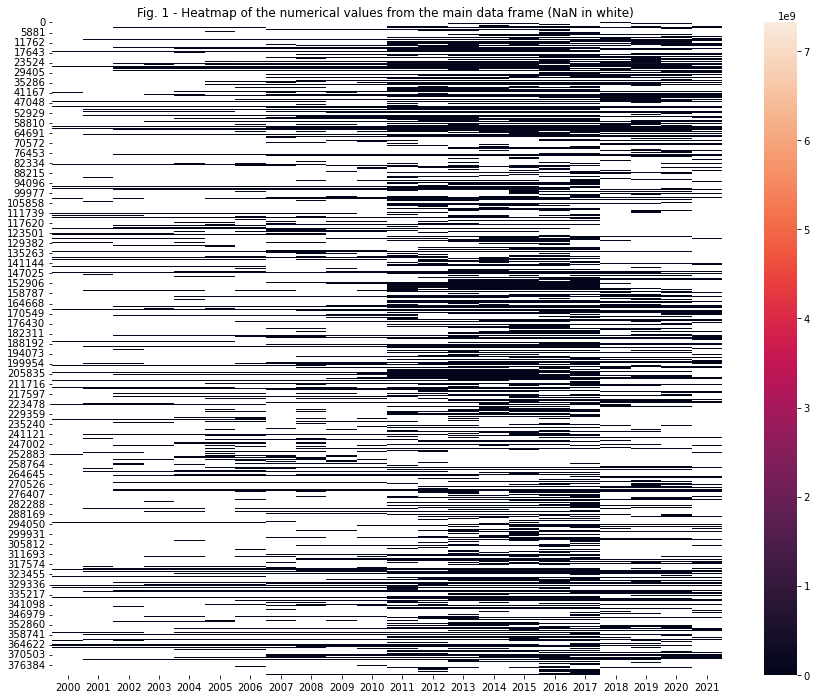

In [22]:
fig, ax = plt.subplots(figsize=(15, 12)) # Setting size of the plot
sns.heatmap(cuantitativeColumns, ax = ax)
ax.set_title('Fig. 1 - Heatmap of the numerical values from the main data frame (NaN in white) ');

-> Merging cuantitative and qualitative data frames

In [23]:
mainDF = pd.concat([categoricalDF, cuantitativeColumns], axis=1)
mainDF

,freq,pres,species,natvessr,dest_use,unit,geo,2000,2001,2002,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,A,CLA,BSS,TOTAL,HCN,EUR,EU27_2020,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,19.396,NaN,NaN,NaN
1,A,CLA,BSS,TOTAL,HCN,EUR,NL,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,19.396,NaN,NaN,NaN
2,A,CLA,BSS,TOTAL,HCN,EUR_T,EU27_2020,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9698.000,NaN,NaN,NaN
3,A,CLA,BSS,TOTAL,HCN,EUR_T,NL,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9698.000,NaN,NaN,NaN
4,A,CLA,BSS,TOTAL,HCN,TPW,EU27_2020,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.002,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382231,A,WHL,WIT,TOTAL,IND,EUR_T,NO,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327.4467,NaN,NaN
382232,A,WHL,WIT,TOTAL,IND,TPW,NO,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4000,NaN,NaN
382233,A,WHL,WIT,TOTAL,TOTAL,EUR,NO,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.9787,NaN,NaN
382234,A,WHL,WIT,TOTAL,TOTAL,EUR_T,NO,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327.4467,NaN,NaN


Since the columns "freq" (frequency) and "natvessr" (Nationality of registration of vessel) have one unique value (A and TOTAL respecitvely), I dropped them:

In [24]:
print(mainDF['freq'].value_counts(),'\n\n',mainDF['natvessr'].value_counts())

A    382236
Name: freq, dtype: int64 

 TOTAL    382236
Name: natvessr, dtype: int64


In [25]:
mainDF.drop(['freq','natvessr'], axis=1, inplace = True) # inplace to save memory
mainDF

,pres,species,dest_use,unit,geo,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,CLA,BSS,HCN,EUR,EU27_2020,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,19.396,NaN,NaN,NaN
1,CLA,BSS,HCN,EUR,NL,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,19.396,NaN,NaN,NaN
2,CLA,BSS,HCN,EUR_T,EU27_2020,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9698.000,NaN,NaN,NaN
3,CLA,BSS,HCN,EUR_T,NL,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9698.000,NaN,NaN,NaN
4,CLA,BSS,HCN,TPW,EU27_2020,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.002,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382231,WHL,WIT,IND,EUR_T,NO,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327.4467,NaN,NaN
382232,WHL,WIT,IND,TPW,NO,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4000,NaN,NaN
382233,WHL,WIT,TOTAL,EUR,NO,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.9787,NaN,NaN
382234,WHL,WIT,TOTAL,EUR_T,NO,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327.4467,NaN,NaN


Removing all rows from the UK, since it's out of the EU. Also de counts by different UE forms ('EU', 'EU27_2020' & 'EU28'):

In [26]:
# dropping all rows where geo is UK
mainDF.drop(mainDF[mainDF.geo == "UK"].index, inplace=True)
# dropping all EU rows
mainDF.drop(mainDF[mainDF.geo.str.contains("EU")].index, inplace=True)
# resetting index
mainDF.reset_index(inplace = True, drop = True)
mainDF

,pres,species,dest_use,unit,geo,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,CLA,BSS,HCN,EUR,NL,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,19.396,NaN,NaN,NaN
1,CLA,BSS,HCN,EUR_T,NL,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9698.000,NaN,NaN,NaN
2,CLA,BSS,HCN,TPW,NL,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.002,NaN,NaN,NaN
3,CLA,BSS,TOTAL,EUR,NL,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,19.396,NaN,NaN,NaN
4,CLA,BSS,TOTAL,EUR_T,NL,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9698.000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194701,WHL,WIT,IND,EUR_T,NO,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327.4467,NaN,NaN
194702,WHL,WIT,IND,TPW,NO,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4000,NaN,NaN
194703,WHL,WIT,TOTAL,EUR,NO,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.9787,NaN,NaN
194704,WHL,WIT,TOTAL,EUR_T,NO,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327.4467,NaN,NaN


### General check

In [27]:
mainDF.shape

(194706, 27)

In [28]:
mainDF.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,1.936900e+04,2.452400e+04,3.807600e+04,3.756400e+04,4.591000e+04,5.032800e+04,5.125800e+04,6.351900e+04,6.959800e+04,6.675500e+04,...,7.915500e+04,8.755500e+04,8.628800e+04,9.550400e+04,9.670100e+04,9.459500e+04,9.446500e+04,9.975100e+04,9.786200e+04,8.920100e+04
mean,1.704967e+06,1.955018e+06,7.510237e+06,8.319046e+06,7.048849e+06,6.541424e+06,6.914756e+06,5.859069e+06,4.902938e+06,4.592531e+06,...,4.726961e+06,4.036553e+06,4.488687e+06,4.031740e+06,4.272437e+06,3.947442e+06,3.938051e+06,3.708417e+06,3.508017e+06,2.633736e+06
std,1.230406e+07,1.390989e+07,6.184356e+07,6.181721e+07,5.788541e+07,5.669887e+07,5.965515e+07,5.324115e+07,4.856256e+07,4.671652e+07,...,5.017540e+07,4.599541e+07,5.313435e+07,4.742797e+07,4.936938e+07,4.791099e+07,4.740154e+07,4.568790e+07,4.296176e+07,3.270279e+07
min,-1.080196e+03,-5.726340e+03,-6.190809e+02,-3.374911e+04,-2.283159e+04,-2.923485e+04,-1.851069e+04,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.302000e+02,1.394000e+02,1.922853e+02,2.303678e+02,1.195000e+02,1.083000e+02,1.840000e+02,1.568519e+02,1.084500e+02,9.740000e+01,...,1.000000e+02,6.701000e+01,5.653900e+01,5.229600e+01,5.808800e+01,4.374000e+01,5.280000e+01,4.500025e+01,4.410000e+01,3.695500e+01
50%,1.653246e+03,1.797187e+03,2.133801e+03,2.452000e+03,2.036891e+03,2.137888e+03,2.306000e+03,2.104000e+03,2.007460e+03,1.954500e+03,...,1.980833e+03,1.834156e+03,1.822997e+03,1.668165e+03,1.693870e+03,1.715000e+03,1.853519e+03,1.747870e+03,1.633520e+03,1.738291e+03
75%,2.125329e+04,1.983127e+04,3.547945e+04,4.427849e+04,2.630919e+04,2.580090e+04,2.762157e+04,2.145737e+04,1.570574e+04,1.453857e+04,...,1.315089e+04,1.104655e+04,1.132809e+04,1.016520e+04,1.091867e+04,1.061070e+04,1.158000e+04,1.056754e+04,1.021680e+04,1.044718e+04
max,3.765010e+08,4.082418e+08,1.958819e+09,1.873371e+09,1.847680e+09,1.513230e+09,1.679665e+09,1.671770e+09,1.916031e+09,1.793181e+09,...,1.958458e+09,2.139882e+09,2.696236e+09,2.127582e+09,2.113555e+09,2.152023e+09,2.135951e+09,2.194340e+09,2.190319e+09,1.779608e+09


In [29]:
mainDF.describe(include = object)

,pres,species,dest_use,unit,geo
count,194706,194706,194706,194706,194706
unique,41,1511,3,3,25
top,TOTAL,F00,TOTAL,TPW,ES
freq,37062,2479,93029,67889,49270


### DF with TOTALS per country for GEOPLOT

In [30]:
mapChart = mainDF.query('pres == "TOTAL" & species == "F00" & dest_use == "TOTAL" & unit == "TPW"').iloc[:,4:]
mapChart

,geo,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
163180,BE,17987.3,18357.4,19874.40,20278.8,21243.30,19601.00,18257.80,19120.000,17349.000,...,17646.000,1.639540e+04,1.973730e+04,1.867140e+04,1.685960e+04,1.691240e+04,1.501260e+04,1.383430e+04,1.269930e+04,12255.8000
163181,BG,NaN,NaN,NaN,NaN,NaN,3408.00,4388.40,7831.200,7651.900,...,8150.400,9.533892e+03,8.565100e+03,8.746600e+03,8.562401e+03,8.506841e+03,8.545937e+03,1.026810e+04,6.228954e+03,8919.0347
163182,CY,NaN,NaN,NaN,NaN,773.80,1329.10,1897.50,2019.100,1867.700,...,1297.000,1.169200e+03,1.248697e+03,1.475300e+03,1.481900e+03,1.568800e+03,1.277059e+03,1.267005e+03,1.074249e+03,1194.6490
163183,DE,86560.9,84530.9,81781.30,102478.5,134199.50,139919.20,130174.90,113137.600,101344.200,...,107054.600,9.867780e+04,1.058424e+05,1.069443e+05,1.187922e+05,1.628480e+05,1.061784e+05,8.300627e+04,8.727232e+04,64100.2581
163184,DK,1077140.0,910821.8,851962.60,980281.6,977369.40,1005621.60,852890.30,1049492.900,974362.700,...,612303.100,8.410728e+05,9.906022e+05,1.148943e+06,8.530956e+05,NaN,NaN,NaN,9.110132e+05,641206.2000
163185,EE,NaN,NaN,NaN,NaN,NaN,69405.70,70623.70,75824.139,81825.029,...,61027.662,6.211730e+04,6.037356e+04,6.325048e+04,5.964835e+04,6.234024e+04,6.350416e+04,8.099218e+04,7.637372e+04,78370.0238
163186,EL,90381.2,86565.9,91891.46,89632.0,91133.98,90445.09,96694.25,93639.340,83820.990,...,60725.480,6.363800e+04,6.031868e+04,6.443139e+04,NaN,NaN,NaN,8.223270e+04,7.053590e+04,58691.9000
163187,ES,983806.1,962823.0,918245.10,876467.7,700706.10,703248.70,777542.60,836770.500,891284.400,...,732943.940,8.682778e+05,1.079019e+06,8.389770e+05,7.995991e+05,8.513539e+05,8.431587e+05,7.847806e+05,7.023386e+05,700237.6300
163188,FI,96417.7,93499.0,96710.50,76210.3,84560.60,84098.30,91050.00,92793.300,90685.500,...,102794.600,1.097769e+05,9.811700e+04,9.764690e+04,1.046684e+05,1.337703e+05,1.180143e+05,9.224655e+04,8.848900e+04,77758.8000
163189,FR,371264.3,366121.4,374779.30,334546.8,321292.80,294990.10,325910.00,310958.100,285861.400,...,365170.595,3.742880e+05,3.426586e+05,2.913051e+05,3.279077e+05,3.050570e+05,3.326669e+05,3.044533e+05,2.751748e+05,285225.6000


The countries have an alpha-2 ISO code but choropleth takes alpha-3 values. On the other hand Greece has the geo "EL" assigned, which is not ISO:

In [31]:
np.sort(mainDF['geo'].unique())

array(['BE', 'BG', 'CY', 'DE', 'DK', 'EE', 'EL', 'ES', 'FI', 'FR', 'HR',
       'IE', 'IS', 'IT', 'LT', 'LV', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO',
       'SE', 'SI', 'TR'], dtype=object)

In [32]:
# Switching 'EL' for 'GR'
mapChart['geo'] = mapChart['geo'].replace({'EL':'GR'})
# Switching alpha-2 for alpha-3 codes with pycountry-convert package
mapChart['geo'] = mapChart.geo.apply(lambda x: country_name_to_country_alpha3(country_alpha2_to_country_name(x)))
mapChart['geo']

163180    BEL
163181    BGR
163182    CYP
163183    DEU
163184    DNK
163185    EST
163186    GRC
163187    ESP
163188    FIN
163189    FRA
163190    HRV
163191    IRL
163192    ISL
163193    ITA
163194    LTU
163195    LVA
163196    MLT
163197    NLD
163198    NOR
163199    POL
163200    PRT
163201    ROU
163202    SWE
163203    SVN
163204    TUR
Name: geo, dtype: object

In [33]:
# NaN's per row
mapChart.isnull().sum(axis=1)

163180     0
163181     5
163182     4
163183     0
163184     3
163185     5
163186     3
163187     0
163188     0
163189     0
163190    11
163191     4
163192     1
163193     0
163194     5
163195     5
163196    13
163197     0
163198     1
163199     5
163200     0
163201     6
163202     0
163203     2
163204    16
dtype: int64

In [34]:
# Proportion of NaN's
mapChart.isnull().sum().sum()*100/(mapChart.iloc[:,1:].size)

16.181818181818183

In [35]:
mapChart.iloc[:,1:].apply(pd.DataFrame.describe, axis=1)

,count,mean,std,min,25%,50%,75%,max
163180,22.0,1.732753e+04,2372.849869,1.225580e+04,1.619545e+04,1.749750e+04,1.900785e+04,2.124330e+04
163181,17.0,7.960580e+03,1795.591339,3.408000e+03,7.651900e+03,8.545937e+03,8.919035e+03,1.026810e+04
163182,18.0,1.377258e+03,307.882721,7.738000e+02,1.208161e+03,1.303100e+03,1.480250e+03,2.019100e+03
163183,22.0,1.047739e+05,22959.447745,6.410026e+04,8.673875e+04,1.041604e+05,1.163026e+05,1.628480e+05
163184,19.0,9.297020e+05,136486.314610,6.123031e+05,8.529929e+05,9.743627e+05,1.020567e+06,1.148943e+06
163185,17.0,7.093594e+04,9348.062803,5.964835e+04,6.234024e+04,6.940570e+04,7.837002e+04,8.705941e+04
163186,19.0,7.839664e+04,13461.705071,5.869190e+04,6.403470e+04,8.223270e+04,9.041314e+04,9.669425e+04
163187,22.0,8.192576e+05,105325.431712,7.002376e+05,7.177435e+05,8.181848e+05,8.744202e+05,1.079019e+06
163188,22.0,9.431751e+04,13666.350137,7.621030e+04,8.443993e+04,9.251993e+04,9.799948e+04,1.337703e+05
163189,22.0,3.193813e+05,42428.360767,2.142133e+05,2.922264e+05,3.236014e+05,3.595426e+05,3.747793e+05


### Inputing 

In [37]:
imputer = MissForest()
X_imputed = imputer.fit_transform(mapChart.iloc[:,1:])

C:\Users\elrec\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\elrec\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\elrec\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\elrec\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\elrec\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

Iteration: 0


C:\Users\elrec\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\elrec\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\elrec\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\elrec\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\elrec\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

Iteration: 1


C:\Users\elrec\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\elrec\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\elrec\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\elrec\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\elrec\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

Iteration: 2


C:\Users\elrec\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\elrec\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\elrec\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\elrec\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\elrec\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

Iteration: 3


C:\Users\elrec\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\elrec\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\elrec\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\elrec\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\elrec\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

Iteration: 4


C:\Users\elrec\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\elrec\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\elrec\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\elrec\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\elrec\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

Iteration: 5


In [38]:
type(X_imputed)

numpy.ndarray

In [39]:
# Creating df out of the np array 
mapChartInp = pd.DataFrame(X_imputed, columns = mapChart.iloc[:,1:].columns)

In [40]:
# adding geo column, column with index 0, labelled 'geo' and entered the values as a numpy array
mapChartInp.insert(0,'geo',mapChart['geo'].to_numpy())

In [75]:
# Melting the df to prepare the input of choropleth
mapChartInpMelt = mapChartInp.melt(id_vars=['geo']) # can sort rows per geo and year but not necessary for choropleth -> .sort_values(by = ['geo', 'variable'])

In [76]:
mapChartInpMelt

,geo,variable,value
0,BEL,2000,1.798730e+04
1,BGR,2000,4.196905e+04
2,CYP,2000,4.196905e+04
3,DEU,2000,8.656090e+04
4,DNK,2000,1.077140e+06
...,...,...,...
545,PRT,2021,1.477161e+05
546,ROU,2021,3.127160e+03
547,SWE,2021,3.639376e+04
548,SVN,2021,1.064467e+02


In [84]:
fig = px.choropleth(mapChartInpMelt,
                    locations = "geo",
                    animation_frame = "variable",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    color="value", # showing colors according to the year 
                    hover_name="value",) # column to display in hover information
                    
fig.update_layout(title_text = 'European fish landings in tonnes',geo_scope = 'europe')

fig.show()

IRISH DATA FRAME

In [44]:
irishDF = mainDF[mainDF['geo'] == 'IE']
irishDF

,pres,species,dest_use,unit,geo,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
44,CLA,CRE,HCN,EUR,IE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2279.2000,4625.9132,8006.8901,22849.4278,17183.6710,NaN,114224.3198
53,CLA,CRE,HCN,EUR_T,IE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,468.9712,627.6680,600.4417,756.1166,853.0289,NaN,4785.1065
62,CLA,CRE,HCN,TPW,IE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.8600,7.3700,13.3350,30.2195,20.1443,NaN,23.8708
74,CLA,CRE,TOTAL,EUR,IE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2279.2000,4625.9132,8006.8901,22849.4278,17183.6710,NaN,NaN
83,CLA,CRE,TOTAL,EUR_T,IE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,468.9712,627.6680,600.4417,756.1166,853.0289,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194196,UNK,WRF,TOTAL,EUR_T,IE,NaN,NaN,NaN,NaN,NaN,...,2000.000,NaN,NaN,NaN,2000.0000,2000.0000,NaN,NaN,NaN,NaN
194197,UNK,WRF,TOTAL,TPW,IE,NaN,NaN,NaN,NaN,NaN,...,1.099,NaN,NaN,NaN,0.1620,0.3730,NaN,NaN,NaN,NaN
194204,UNK,YRS,TOTAL,EUR,IE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194205,UNK,YRS,TOTAL,EUR_T,IE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Reindexing the Irish data frame and dropping the column 'geo'

In [45]:
# inplace to save memory and dropping the old index columns which would remain otherwise
irishDF.reset_index(inplace = True, drop = True)
irishDF = irishDF.drop('geo', axis=1)
irishDF

,pres,species,dest_use,unit,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,CLA,CRE,HCN,EUR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2279.2000,4625.9132,8006.8901,22849.4278,17183.6710,NaN,114224.3198
1,CLA,CRE,HCN,EUR_T,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,468.9712,627.6680,600.4417,756.1166,853.0289,NaN,4785.1065
2,CLA,CRE,HCN,TPW,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.8600,7.3700,13.3350,30.2195,20.1443,NaN,23.8708
3,CLA,CRE,TOTAL,EUR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2279.2000,4625.9132,8006.8901,22849.4278,17183.6710,NaN,NaN
4,CLA,CRE,TOTAL,EUR_T,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,468.9712,627.6680,600.4417,756.1166,853.0289,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,UNK,WRF,TOTAL,EUR_T,NaN,NaN,NaN,NaN,NaN,NaN,...,2000.000,NaN,NaN,NaN,2000.0000,2000.0000,NaN,NaN,NaN,NaN
10143,UNK,WRF,TOTAL,TPW,NaN,NaN,NaN,NaN,NaN,NaN,...,1.099,NaN,NaN,NaN,0.1620,0.3730,NaN,NaN,NaN,NaN
10144,UNK,YRS,TOTAL,EUR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10145,UNK,YRS,TOTAL,EUR_T,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
irishDF.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,2.893000e+03,2.095000e+03,3.032000e+03,2.008000e+03,2.014000e+03,1.910000e+03,1.878000e+03,1.968000e+03,1.866000e+03,2.064000e+03,...,3.126000e+03,2.034000e+03,1.980000e+03,3.846000e+03,3.828000e+03,3.372000e+03,9.030000e+02,1.464000e+03,6.410000e+02,8.670000e+02
mean,3.843752e+05,1.015908e+06,2.369275e+06,5.299102e+06,4.056583e+06,3.282618e+06,7.046261e+06,7.778967e+06,5.625251e+06,4.809590e+06,...,4.894405e+06,6.169077e+06,1.072156e+07,3.378662e+06,4.911704e+06,2.743489e+06,4.873070e+05,8.963829e+05,4.947820e+05,1.102179e+05
std,1.960634e+06,4.831585e+06,1.366171e+07,2.518250e+07,1.882754e+07,1.551653e+07,3.232252e+07,3.563661e+07,2.523517e+07,2.298492e+07,...,2.960729e+07,3.161966e+07,5.777433e+07,2.336874e+07,3.391787e+07,1.764816e+07,3.156235e+06,6.711495e+06,3.094199e+06,6.927590e+05
min,0.000000e+00,0.000000e+00,1.000000e-01,0.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-01,0.000000e+00,...,7.000000e-03,2.000000e-02,6.000000e-02,1.700000e-03,2.000000e-03,2.000000e-03,1.020000e-01,5.400000e-03,0.000000e+00,0.000000e+00
25%,5.710000e+01,1.953500e+02,3.805000e+02,7.602000e+02,5.733626e+02,6.000000e+02,6.887000e+02,6.430000e+02,7.760877e+02,6.396000e+02,...,3.407352e+02,7.560600e+02,9.470000e+02,1.104780e+02,2.209186e+02,1.551362e+02,2.365821e+02,2.677004e+02,7.305690e+01,2.320940e+01
50%,1.142764e+03,2.095906e+03,1.803000e+03,3.155735e+03,2.558332e+03,3.014800e+03,3.120164e+03,3.574456e+03,3.200000e+03,2.952865e+03,...,2.000000e+03,2.424454e+03,3.393475e+03,1.065487e+03,1.500000e+03,2.000000e+03,2.376927e+03,2.231978e+03,1.876877e+03,1.394353e+03
75%,6.513756e+03,1.555847e+04,2.614490e+04,1.023109e+05,5.984483e+04,6.461626e+04,8.479200e+04,9.182778e+04,1.057665e+05,5.300488e+04,...,2.088816e+04,8.615991e+04,5.243935e+04,6.956148e+03,1.075500e+04,9.486401e+03,2.036155e+04,1.942178e+04,1.575874e+04,1.000000e+04
max,2.113687e+07,6.547542e+07,1.708116e+08,2.530127e+08,1.938970e+08,1.490479e+08,3.148100e+08,3.642098e+08,2.496685e+08,2.360629e+08,...,3.967362e+08,2.994921e+08,5.079261e+08,3.089532e+08,4.859373e+08,2.921439e+08,4.455483e+07,1.522761e+08,6.162326e+07,1.052125e+07


In [47]:
irishDF.describe(include = object)

,pres,species,dest_use,unit
count,10147,10147,10147,10147
unique,25,327,3,3
top,TOTAL,F01,TOTAL,TPW
freq,2062,152,5120,3439


In [48]:
irishDF.isnull().sum()

pres           0
species        0
dest_use       0
unit           0
2000        7254
2001        8052
2002        7115
2003        8139
2004        8133
2005        8237
2006        8269
2007        8179
2008        8281
2009        8083
2010        8013
2011        8089
2012        7021
2013        8113
2014        8167
2015        6301
2016        6319
2017        6775
2018        9244
2019        8683
2020        9506
2021        9280
dtype: int64

In [49]:
irishDF.head(50)

,pres,species,dest_use,unit,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,CLA,CRE,HCN,EUR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2279.2000,4625.9132,8006.8901,22849.4278,17183.6710,NaN,114224.3198
1,CLA,CRE,HCN,EUR_T,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,468.9712,627.6680,600.4417,756.1166,853.0289,NaN,4785.1065
2,CLA,CRE,HCN,TPW,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.8600,7.3700,13.3350,30.2195,20.1443,NaN,23.8708
3,CLA,CRE,TOTAL,EUR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2279.2000,4625.9132,8006.8901,22849.4278,17183.6710,NaN,NaN
4,CLA,CRE,TOTAL,EUR_T,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,468.9712,627.6680,600.4417,756.1166,853.0289,NaN,NaN
5,CLA,CRE,TOTAL,TPW,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.8600,7.3700,13.3350,30.2195,20.1443,NaN,NaN
6,CLA,F00,HCN,EUR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,36416.2000,4625.9132,8006.8901,22849.4278,67403.8528,NaN,NaN
7,CLA,F00,HCN,EUR_T,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,933.8206,627.6680,600.4417,756.1166,624.1860,NaN,NaN
8,CLA,F00,HCN,TPW,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,38.9970,7.3700,13.3350,30.2195,107.9868,NaN,NaN
9,CLA,F00,TOTAL,EUR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,36416.2000,4625.9132,8006.8901,22849.4278,67403.8528,NaN,NaN


Checking the proportion of NaN values (78.5% of the numerical values are missing):

In [50]:
(irishDF.isnull().sum().sum() * 100) / (len(irishDF) * 22)

78.50641031384109

Heatmap to visualize Nan values (in white)

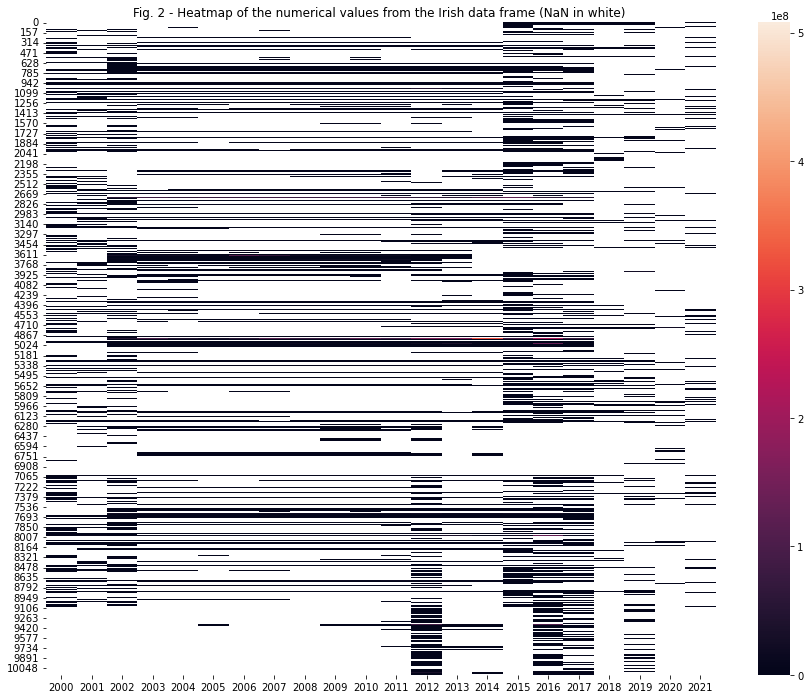

In [51]:
fig, ax = plt.subplots(figsize=(15, 12)) # Setting size of the plot
sns.heatmap(irishDF[['2000','2001','2002','2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']], ax = ax) # Selecting the numerical columns only
ax.set_title('Fig. 2 - Heatmap of the numerical values from the Irish data frame (NaN in white) ');

Checking freshwater fish and aquatic plants landing data

In [52]:
# quering all rows from the species entered, then query again to get totals of presentation forms
irishDF.query('species == "F02" | species == "F10" | species == "F41" | species == "F51" | species == "F90"').query('pres == "TOTAL"')

,pres,species,dest_use,unit,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
7577,TOTAL,F02,HCN,EUR,NaN,NaN,253.948,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7578,TOTAL,F02,HCN,EUR_T,NaN,NaN,1269.740,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7579,TOTAL,F02,HCN,TPW,0.1,1.1,0.200,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7580,TOTAL,F02,TOTAL,EUR,NaN,NaN,253.948,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7581,TOTAL,F02,TOTAL,EUR_T,NaN,NaN,1269.740,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7582,TOTAL,F02,TOTAL,TPW,0.1,1.1,0.200,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# Checking the numerical values of the row with totals
irishDF.iloc[7582,4:]

2000    0.1
2001    1.1
2002    0.2
2003    NaN
2004    NaN
2005    NaN
2006    NaN
2007    NaN
2008    NaN
2009    NaN
2010    NaN
2011    NaN
2012    NaN
2013    NaN
2014    NaN
2015    NaN
2016    NaN
2017    NaN
2018    NaN
2019    NaN
2020    NaN
2021    NaN
Name: 7582, dtype: object

Plotting the total tones of aquatic animal landing per year

In [54]:
# row in question
irishDF.iloc[7576]

pres              TOTAL
species             F01
dest_use          TOTAL
unit                TPW
2000           202908.5
2001           254302.2
2002           173982.0
2003           299193.0
2004           260449.9
2005           198958.3
2006           220211.8
2007           244295.7
2008           209668.4
2009           247050.4
2010          247841.15
2011          180970.09
2012         340975.871
2013        229092.8118
2014        270835.1244
2015        243580.8393
2016        263025.0901
2017        263760.6687
2018                NaN
2019                NaN
2020                NaN
2021                NaN
Name: 7576, dtype: object

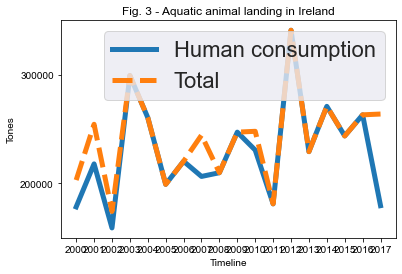

In [55]:
# each plot is specified by its corresponding row (total aquatic animals, and total aquatic animal for human consumption)
ax = sns.lineplot(data=[irishDF.loc[7576][4:],irishDF.loc[7570][4:]], linewidth = 5).set(
    xlabel ="Timeline", 
    ylabel = "Tones", 
    title = 'Fig. 3 - Aquatic animal landing in Ireland')

# setting up size and legend
sns.set(font_scale=2, rc={'figure.figsize':(30,15)}) # tick label font size and chart size
plt.legend(labels=['Human consumption', 'Total']);

Showing distribution params

In [56]:
print(irishDF.iloc[7576][4:].mean(),'\n',irishDF.iloc[7576][4:].std(),'\n',irishDF.iloc[7576][4:].median())

241727.8802944444 
 41152.9412817994 
 245673.05


General presentation forms

In [57]:
# Selecting total fishery products (F00) and the main presentations forms (fresh, salting, smoked, dried, roes, whole and unknown)
irishDF.query('species == "F00" & dest_use == "TOTAL" & unit == "TPW"').query('pres == "FRE" | pres == "FRO" | pres == "SAL" | pres == "SMO" | pres == "COK" | pres == "DRI" | pres == "CLA" | pres == "ROE" | pres == "WHL"| pres == "UNK"') #.iloc[:,4:].apply(pd.DataFrame.describe, axis=1).sort_values('mean',ascending=False)

,pres,species,dest_use,unit,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
11,CLA,F00,TOTAL,TPW,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,38.9970,7.3700,13.3350,30.2195,107.9868,NaN,NaN
547,FRE,F00,TOTAL,TPW,202902.9,254197.7,173981.9,299119.2,260428.4,198843.9,...,233190.173,228083.5546,268699.6007,243541.8423,196191.3449,179292.6022,NaN,NaN,NaN,NaN
6278,FRO,F00,TOTAL,TPW,NaN,104.5,0.1,73.8,21.5,73.4,...,7.583,NaN,1.1250,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6824,ROE,F00,TOTAL,TPW,5.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6875,SAL,F00,TOTAL,TPW,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9345,UNK,F00,TOTAL,TPW,NaN,NaN,NaN,NaN,NaN,41.0,...,107778.115,1009.2572,2134.3987,NaN,66826.3752,84454.7315,NaN,NaN,NaN,NaN


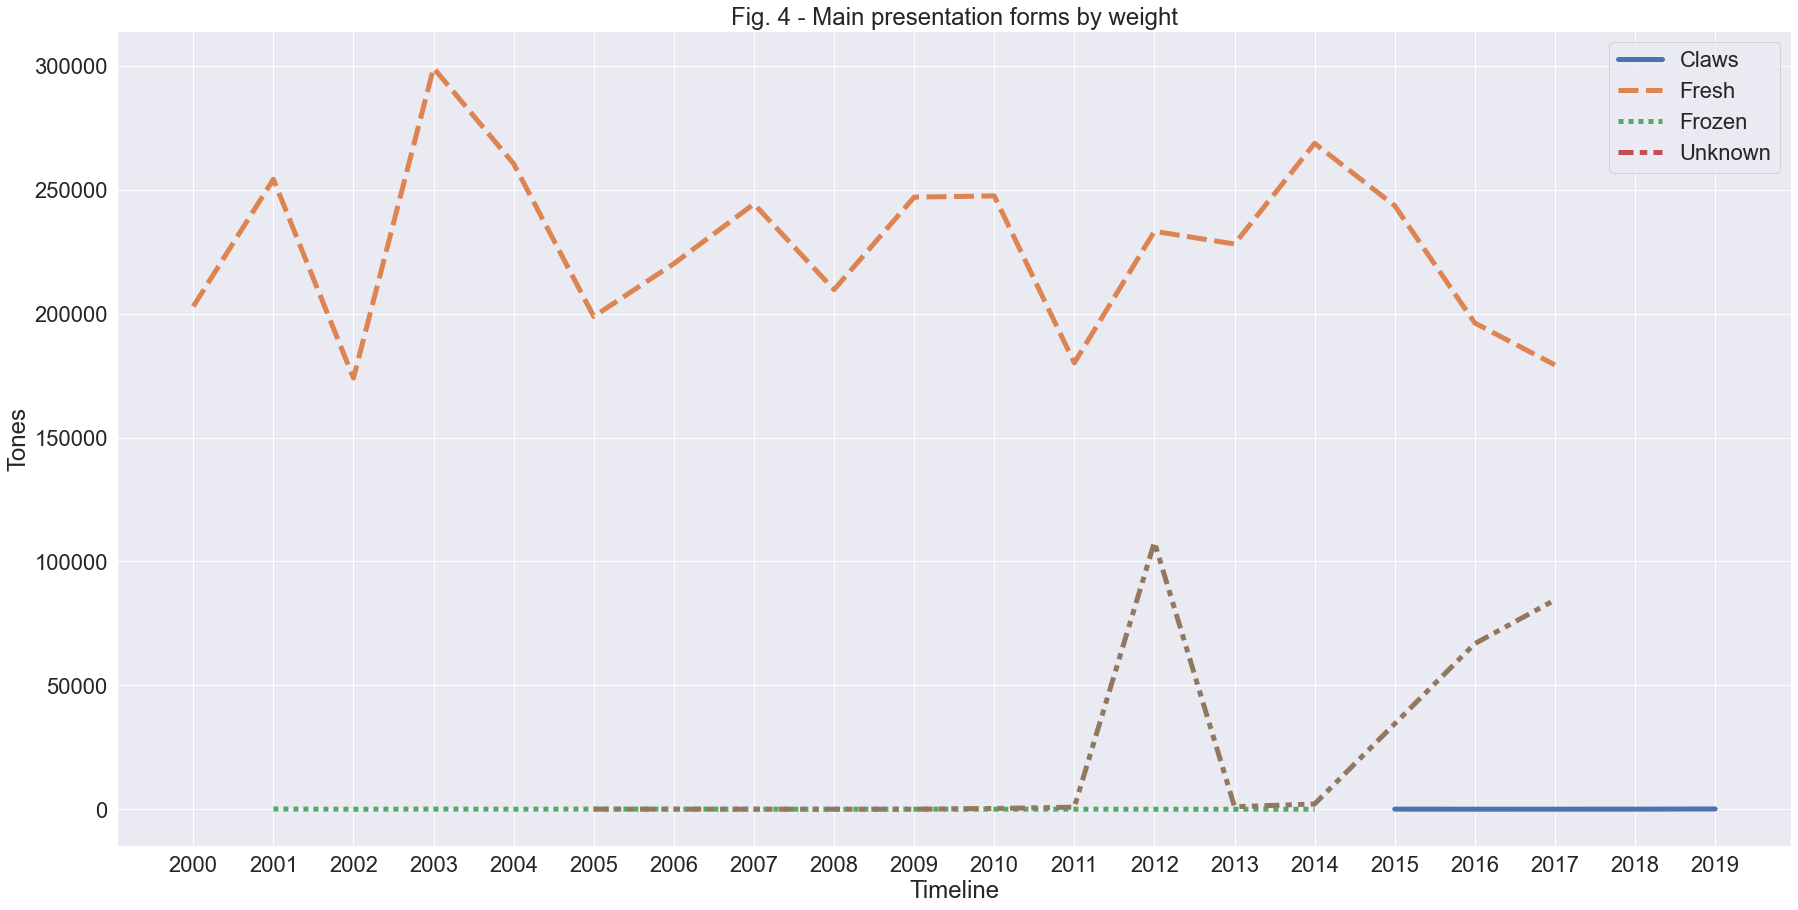

In [58]:
# each plot is specified by its corresponding row (total aquatic animals, and total aquatic animal for human consumption)
ax = sns.lineplot(data=[irishDF.loc[11][4:],irishDF.loc[547][4:],irishDF.loc[6278][4:],irishDF.loc[6824][4:],irishDF.loc[6875][4:],irishDF.loc[9345][4:]],linewidth = 5).set(
    xlabel ="Timeline", 
    ylabel = "Tones", 
    title = 'Fig. 4 - Main presentation forms by weight')

# setting up size and legend
sns.set(font_scale=2, rc={'figure.figsize':(30,15)}) # tick label font size and chart size
plt.legend(labels=['Claws', 'Fresh', 'Frozen', 'Unknown']);

In [59]:
# Selecting rows containing FRE_ in the presentation column, and then quering the other paramters with total 
irishDF[irishDF['pres'].str.contains('FRE_')].query('species == "F00" & dest_use == "TOTAL" & unit == "TPW"')

,pres,species,dest_use,unit,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2052,FRE_ALI,F00,TOTAL,TPW,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2175,FRE_FIL,F00,TOTAL,TPW,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,14.5925,1.1700,0.0375,NaN,NaN,NaN,NaN
2305,FRE_GUH,F00,TOTAL,TPW,18.8,13.9,NaN,20.2,7.0,6.5,...,NaN,0.6750,9.8330,77.7272,63.2928,14.2672,NaN,NaN,NaN,NaN
2715,FRE_GUT,F00,TOTAL,TPW,37424.6,38055.7,25882.0,31785.1,23981.8,26686.6,...,20888.163,21099.5582,33165.9107,40796.0440,22832.9968,16346.2341,NaN,NaN,NaN,NaN
3588,FRE_NSP,F00,TOTAL,TPW,19286.0,48757.3,25573.4,48562.7,48577.4,14941.2,...,1887.493,58.5700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3933,FRE_OTH,F00,TOTAL,TPW,10.8,180.1,0.8,10.9,154.0,5.2,...,2.343,5.7115,11.3745,3016.3028,341.9599,183.2628,NaN,NaN,NaN,NaN
4337,FRE_TAL,F00,TOTAL,TPW,1213.6,883.4,690.1,1146.4,1051.3,946.1,...,1902.176,1281.7111,1309.3175,3748.1375,2866.9137,2244.1328,NaN,NaN,NaN,NaN
4890,FRE_WHL,F00,TOTAL,TPW,144949.1,166307.3,121835.6,217593.9,186656.9,156258.3,...,208509.998,205637.3288,234203.1650,195889.0384,170085.0116,160504.6679,NaN,NaN,NaN,NaN


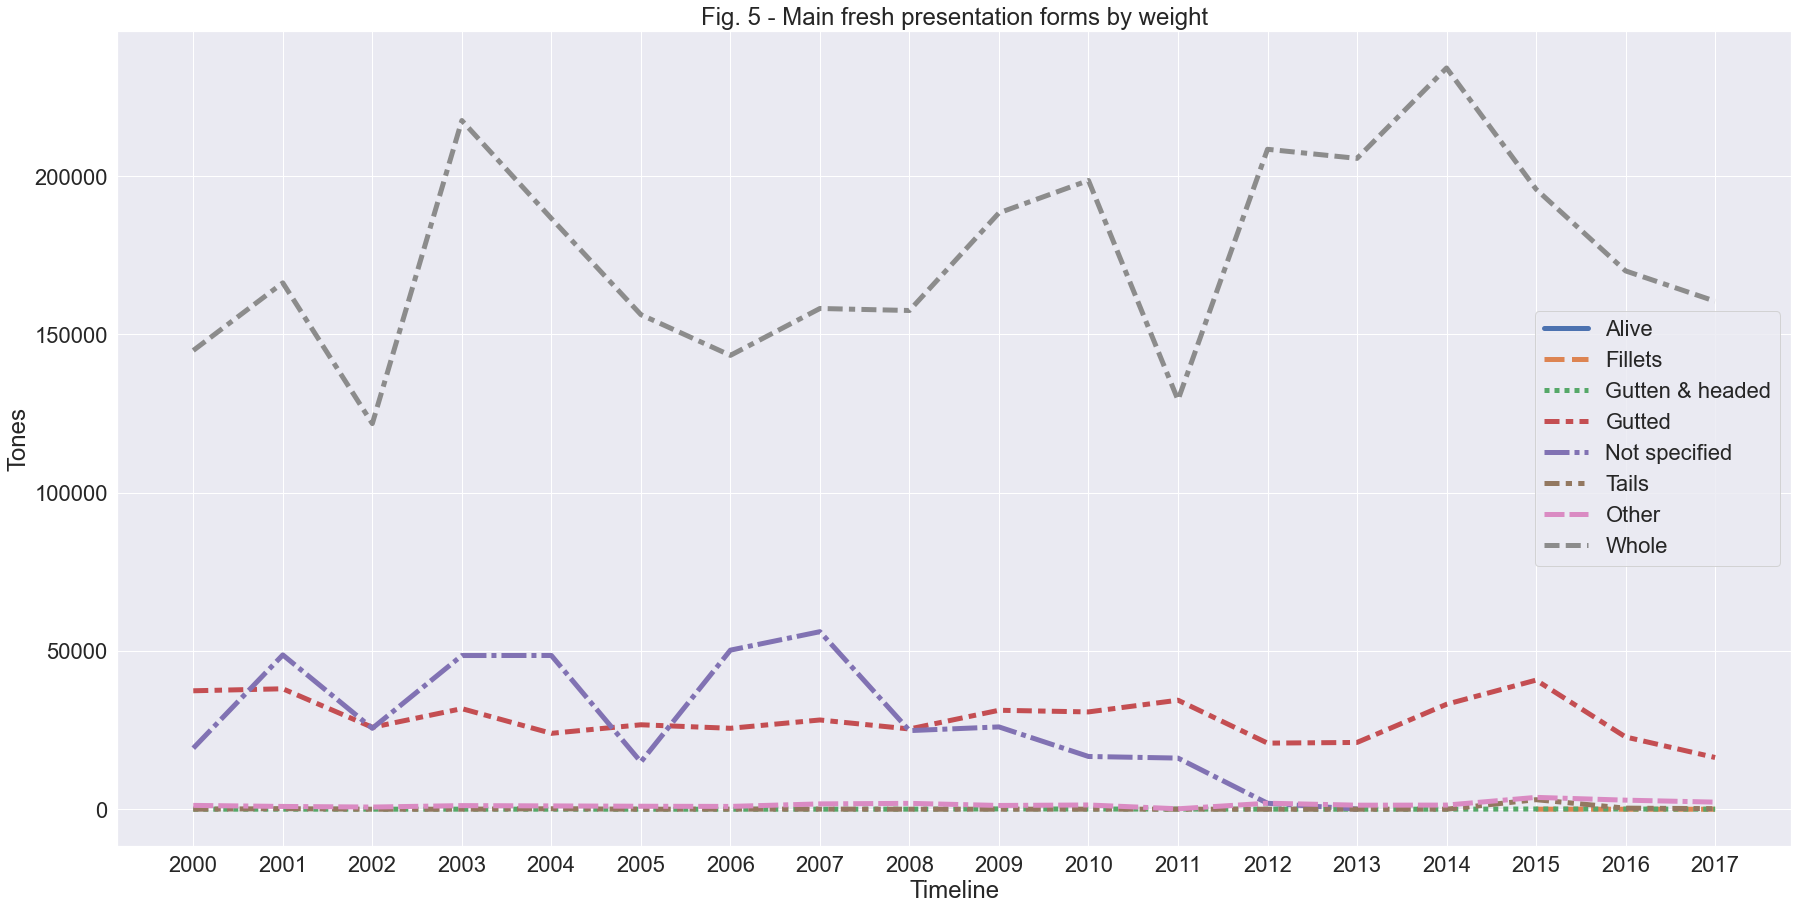

In [60]:
# each plot is specified by its corresponding row (total aquatic animals, and total aquatic animal for human consumption)
ax = sns.lineplot(data=[irishDF.loc[2052][4:],irishDF.loc[2175][4:],irishDF.loc[2305][4:],irishDF.loc[2715][4:],irishDF.loc[3588][4:],irishDF.loc[3933][4:],irishDF.loc[4337][4:],irishDF.loc[4890][4:]],linewidth = 5).set(
    xlabel ="Timeline", 
    ylabel = "Tones", 
    title = 'Fig. 5 - Main fresh presentation forms by weight')

# setting up size and legend
sns.set(font_scale=2, rc={'figure.figsize':(30,15)}) # tick label font size and chart size
plt.legend(labels=['Alive', 'Fillets', 'Gutten & headed', 'Gutted', 'Not specified', 'Tails', 'Other', 'Whole']);

Checking the most expensive species per weight unit

In [61]:
# Calculating the means of the selected rows (rather than columns, reason why I applied the describe to axis X), then sorted the rows by mean in descending order, and limited the output up to the 12th. Stored indexes in a list  
expensiveIrishIndexList = irishDF.query('dest_use == "TOTAL" & unit == "EUR_T"').iloc[:,4:].apply(pd.DataFrame.describe, axis=1).sort_values('mean',ascending=False).head(11).index.tolist()
expensiveIrishIndexList

[8958, 6115, 1893, 2153, 507, 4850, 7527, 9017, 6166, 1952, 4745]

In [62]:
irishDF.iloc[8958, 4:].mean()

41345.7093

In [63]:
# printing the species, result formatted to show one single decimal
for i in expensiveIrishIndexList:
    print(irishDF['species'].loc[i],' - ',"{:.1f}".format(irishDF.iloc[i, 4:].mean()))

TBR  -  41345.7
TBR  -  41345.7
TBR  -  41345.7
SLO  -  34793.1
ENX  -  33773.1
ENX  -  33773.1
ENX  -  33773.1
USI  -  26785.3
USI  -  26785.3
USI  -  26785.3
CRW  -  25945.6


In [64]:
# def topMeanValues():
#     a = input("Enter the unit:")
#     b = int(input("Enter the number of rows:"))
#     indexes = irishDF.query('dest_use == "TOTAL" & unit == a').iloc[:,4:].apply(pd.DataFrame.describe, axis=1).sort_values('mean',ascending=False).head(b).index.tolist()
#     print('The indexes are:',indexes, '/n')
#     for i in indexes:
#         print(irishDF['species'].loc[i],' - ',"{:.1f}".format(irishDF.iloc[i, 4:].mean()))

In [65]:
# topMeanValues()

Totals from other countries

In [66]:
mainDF.query('pres == "TOTAL" & species == "F01" & dest_use == "TOTAL" & unit == "TPW"').iloc[:,5:].isnull().sum().sum()

89

In [67]:
mainDF.query('pres == "TOTAL" & species == "F01" & dest_use == "TOTAL" & unit == "TPW"').iloc[:,5:].melt()

,variable,value
0,2000,1.798730e+04
1,2000,NaN
2,2000,NaN
3,2000,8.656090e+04
4,2000,1.077140e+06
...,...,...
545,2021,1.477160e+05
546,2021,3.127160e+03
547,2021,3.639376e+04
548,2021,1.064467e+02


In [68]:
mainDF.query('pres == "TOTAL" & species == "F01" & dest_use == "TOTAL" & unit == "TPW"').iloc[:,5:].apply(pd.DataFrame.describe, axis=1)

,count,mean,std,min,25%,50%,75%,max
163375,22.0,1.732753e+04,2372.849869,1.225580e+04,1.619545e+04,1.749750e+04,1.900785e+04,2.124330e+04
163376,17.0,7.960580e+03,1795.591339,3.408000e+03,7.651900e+03,8.545937e+03,8.919035e+03,1.026810e+04
163377,18.0,1.377213e+03,307.915678,7.738000e+02,1.208161e+03,1.303100e+03,1.480250e+03,2.019100e+03
163378,22.0,1.047739e+05,22959.447745,6.410026e+04,8.673875e+04,1.041604e+05,1.163026e+05,1.628480e+05
163379,19.0,9.297020e+05,136486.349838,6.123031e+05,8.529929e+05,9.743627e+05,1.020567e+06,1.148943e+06
163380,17.0,7.048259e+04,9184.374807,5.930019e+04,6.230404e+04,6.940570e+04,7.818902e+04,8.602729e+04
163381,19.0,7.839664e+04,13461.705071,5.869190e+04,6.403470e+04,8.223270e+04,9.041314e+04,9.669425e+04
163382,22.0,7.732685e+05,198869.350617,0.000000e+00,7.060143e+05,7.888669e+05,8.622811e+05,1.076867e+06
163383,22.0,9.431751e+04,13666.350137,7.621030e+04,8.443993e+04,9.251993e+04,9.799948e+04,1.337703e+05
163384,22.0,2.900256e+05,47857.412821,1.953806e+05,2.665848e+05,2.895826e+05,3.188733e+05,3.747793e+05


In [69]:
# Italian mean 2000 - 2017
mainDF.loc[327448][5:23].mean()

KeyError: 327448

In [ ]:
mainDF.loc[327446][5:27].mean()

pres              TOTAL
species             F01
dest_use          TOTAL
unit                TPW

In [ ]:
irishDF.loc[7570]

In [ ]:
aquacult = pd.read_table('https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/FISH_AQ_Q/?format=TSV&compressed=true&i', compression='gzip')
aquacult

In [ ]:
aquacult.stack().str.contains(':').sum()

In [ ]:
19117 * 24

In [ ]:
261971 * 100 / 458808